In [22]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
reviews = pd.read_parquet('../dataset/reviews.parquet')
items = pd.read_parquet('../dataset/items.parquet')
games = pd.read_parquet('../dataset/games.parquet')

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   funny               59305 non-null  int32         
 1   last_edited         4277 non-null   datetime64[ns]
 2   item_id             59305 non-null  int32         
 3   recommend           59305 non-null  bool          
 4   review              59305 non-null  object        
 5   sentiment_analysis  59305 non-null  int64         
 6   user_id             59305 non-null  object        
 7   posted_date         49186 non-null  datetime64[ns]
 8   Useful_recommend    59305 non-null  int32         
 9   #_recommend         59305 non-null  int32         
 10  %_recommend         59305 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int32(4), int64(1), object(2)
memory usage: 3.7+ MB


In [10]:
reviews.describe()

,funny,last_edited,item_id,sentiment_analysis,posted_date,Useful_recommend,#_recommend,%_recommend
count,59305.000000,4277,59305.000000,59305.000000,49186,59305.000000,59305.000000,59305.000000
mean,1.194081,2015-01-12 14:12:49.324292608,169935.176511,1.468847,2014-09-08 16:51:37.466758400,2.403271,3.935722,0.280682
min,0.000000,2013-11-25 00:00:00,10.000000,0.000000,2010-10-16 00:00:00,0.000000,0.000000,0.000000
25%,0.000000,2014-06-30 00:00:00,8930.000000,1.000000,2014-02-20 00:00:00,0.000000,0.000000,0.000000
50%,0.000000,2015-01-30 00:00:00,218230.000000,2.000000,2014-09-11 00:00:00,0.000000,0.000000,0.000000
75%,0.000000,2015-07-25 00:00:00,261760.000000,2.000000,2015-05-03 00:00:00,1.000000,2.000000,0.570000
max,2598.000000,2015-12-31 00:00:00,527340.000000,2.000000,2015-12-31 00:00:00,831.000000,954.000000,1.000000
std,25.631882,NaN,132029.464174,0.757096,NaN,20.051660,26.526004,0.393552


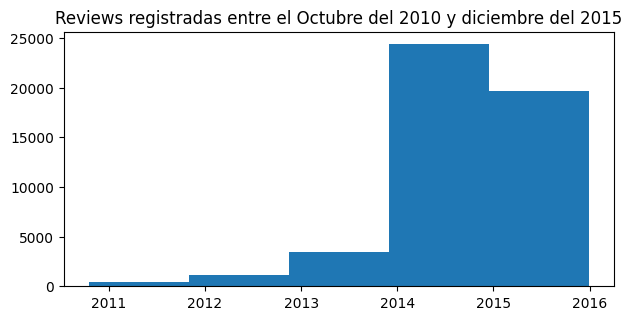

In [17]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(reviews['posted_date'], bins=5)
plt.title('Reviews registradas entre el Octubre del 2010 y diciembre del 2015')
plt.tight_layout()
plt.show()

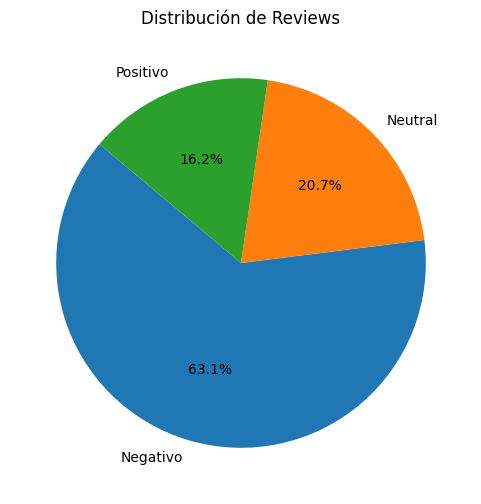

In [25]:
import matplotlib.pyplot as plt

# Calcula los conteos de cada valor en 'sentiment_analysis'
counts = reviews['sentiment_analysis'].value_counts()

# Define las etiquetas para cada valor
labels = ['Negativo', 'Neutral', 'Positivo']

# Crea el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Añade un título
plt.title('Distribución de Reviews')

plt.show()

In [49]:
reviews.sample(2)

,funny,last_edited,item_id,recommend,review,sentiment_analysis,user_id,posted_date,Useful_recommend,#_recommend,%_recommend
32451,0,NaT,221640,True,,1,obviousjosh,2014-06-23,0,0,0.00
4702,2,NaT,253710,False,This game is the definition of ♥♥♥♥ it is like...,0,76561198045459907,2014-12-06,11,17,0.65


<Axes: >

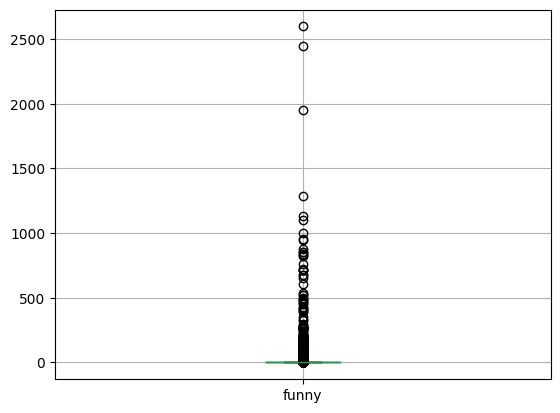

In [26]:
reviews.boxplot(column='funny')

In [1]:
reviews.plot.scatter(x='sentiment_analysis', y='year')


NameError: name 'reviews' is not defined

In [33]:
reviews[['funny','last_edited','item_id','sentiment_analysis','posted_date','Useful_recommend','#_recommend','%_recommend','year']].corr()

,funny,last_edited,item_id,sentiment_analysis,posted_date,Useful_recommend,#_recommend,%_recommend,year
funny,1.000000,0.015474,0.017226,-0.028605,-0.005158,0.440429,0.413053,0.034092,0.030765
last_edited,0.015474,1.000000,-0.033443,-0.027173,0.126139,0.029895,0.032255,0.036802,-0.049232
item_id,0.017226,-0.033443,1.000000,-0.042803,-0.238796,0.052686,0.072437,-0.004076,0.305693
sentiment_analysis,-0.028605,-0.027173,-0.042803,1.000000,0.038134,-0.039273,-0.045956,-0.006178,-0.071932
posted_date,-0.005158,0.126139,-0.238796,0.038134,1.000000,-0.013727,-0.021227,-0.013615,0.932236
Useful_recommend,0.440429,0.029895,0.052686,-0.039273,-0.013727,1.000000,0.967097,0.139707,0.034507
#_recommend,0.413053,0.032255,0.072437,-0.045956,-0.021227,0.967097,1.000000,0.124441,0.040424
%_recommend,0.034092,0.036802,-0.004076,-0.006178,-0.013615,0.139707,0.124441,1.000000,0.038304
year,0.030765,-0.049232,0.305693,-0.071932,0.932236,0.034507,0.040424,0.038304,1.000000


: 

In [8]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094082 entries, 0 to 5094081
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int32 
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
 5   steam_id          object
dtypes: int32(1), int64(2), object(3)
memory usage: 213.8+ MB


In [10]:
items.describe()

,item_id,playtime_forever,playtime_2weeks
count,5.094082e+06,5.094082e+06,5.094082e+06
mean,1.783915e+05,9.905070e+02,9.065389e+00
std,1.318514e+05,5.414098e+03,1.402838e+02
min,1.000000e+01,0.000000e+00,0.000000e+00
25%,3.445000e+04,0.000000e+00,0.000000e+00
50%,2.144200e+05,3.400000e+01,0.000000e+00
75%,2.664300e+05,3.550000e+02,0.000000e+00
max,5.307200e+05,6.427730e+05,1.996700e+04


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     24082 non-null  object        
 1   genres        28851 non-null  object        
 2   app_name      32132 non-null  object        
 3   title         30084 non-null  object        
 4   url           32133 non-null  object        
 5   release_date  29782 non-null  datetime64[ns]
 6   tags          31971 non-null  object        
 7   reviews_url   32133 non-null  object        
 8   specs         31464 non-null  object        
 9   price         32133 non-null  float64       
 10  early_access  32133 non-null  bool          
 11  id            32133 non-null  int32         
 12  developer     28835 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), object(9)
memory usage: 3.1+ MB


In [11]:
games.describe()

,release_date,price,id
count,29782,32133.00000,3.213300e+04
mean,2015-04-21 10:49:09.916056832,8.48619,4.517574e+05
min,1970-07-15 00:00:00,0.00000,1.000000e+01
25%,2014-10-01 00:00:00,1.99000,3.292800e+05
50%,2016-04-18 00:00:00,4.99000,4.520600e+05
75%,2017-04-17 00:00:00,9.99000,5.934000e+05
max,2021-12-31 00:00:00,995.00000,2.028850e+06
std,NaN,15.66249,1.827140e+05
